# Model and Cost Function



## 1. Model representation

The first learning algorithm we will study is the linear regression. We will use it to introduce ourselves in the world of supervised learning algorithms. Among other things, we will see:

- A supervised learning problem example.
- How a supervised learning model looks like.

We will use a [housing prices data set from the city of Portland, OR](https://github.com/girishkuniyal/Predict-housing-prices-in-Portland/blob/master/ex1data2.txt). A plot of the prices of the houses vs. the size looks as follows:

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv("housing_prices.csv", low_memory=False)

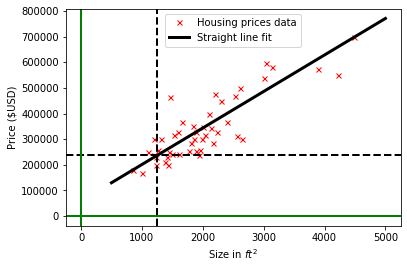

In [3]:
# Plot the price vs. the size
plt.figure(figsize=(6, 4))
plt.plot(data['size'], data['price'], 'xr', ms=5, label='Housing prices data')
x_fit = np.linspace(500, 5000)
y_fit = ((700000 - 180000) / (4500 - 850)) * (x_fit - 850) + 180000
plt.plot(x_fit, y_fit, 'k', lw=3, label='Straight line fit')
plt.axvline(x=1250, ls='--', c='k', lw=2)
plt.axhline(y=((700000 - 180000) / (4500 - 850)) * (1250 - 850) + 180000, ls='--', c='k', lw=2)
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.xlabel('Size in $ft^2$')
plt.ylabel('Price ($USD)')
plt.legend(loc='best')

Let's say a friend, whose house's size is $1250 ft^2$, wants to sell his house, and you want to tell him how much he might be able to sell the house for.

One thing you could do is to fit a straight line to the data (solid black line), and based on that you could tell your friend that he can sell his house for around $\$230000$ USD.

> This is a supervised learning example, because we are given the "right answer" for each of our examples. This is, we knew what was the actual price of each of the houses in our data.

> This is a regression problem example, where we are predicting a real-valued output, namely the price.

Formally, we have the following data set:

In [4]:
data[['size', 'price']].head()

,size,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


... which is called the training set. Our job is to learn from this data how to predict the prices of the houses.

Let's define some notation:

- $m$: Number of training examples.
- $\boldsymbol{x}$: "Input" variable/features.
- $y$: "Output" variable/"target" variable.
- $(\boldsymbol{x}, y)$: Denotes a single training example (a single row in the above table).
- $(\boldsymbol{x}^{(i)}, y^{(i)})$: Denotes the $i-$th training example ($i-$th row in the above table).

In this example, $x$ is the size of the house, $y$ is the price of the house,

In [5]:
# Number of training example
m = len(data)
m

47

... $x^{(1)}=2104$, $x^{(4)}=1416$, $y^{(3)}=369000$.

The following figure represents how supervised learning works:

![Learning Algorithm](figures/LearningAlgorithm.png)

- We feed the training set to the learning algorithm.
- It produces a function $h$ (hypothesis function).
- The function $h$ receives the input variables $\boldsymbol{x}$ and produces an estimation/prediction of the output variable $y$.

### How do we represent $h$?

Our first choice for $h$ will be

$$
h_{\theta}(x) = \theta_0 + \theta_1 x,
$$

i.e., a straight line.

> The technical name for this model is **Linear regression with one variable** or **Univariate linear regression**.

## 2. Cost function

Given the training data set:

In [6]:
data[['size', 'price']].head()

,size,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


we saw that the first hypothesis function we will use is:

$$
h_{\theta}(x) = \theta_0 + \theta_1 x,
$$

where $\theta_0,\theta_1\in\mathbb{R}$ are the parameters.

One natural question that arises is: How to choose $\theta_i$'s?

Depending on our choice for the $\theta_i$'s, the function $h_{\theta}$ may take different forms, for instance:

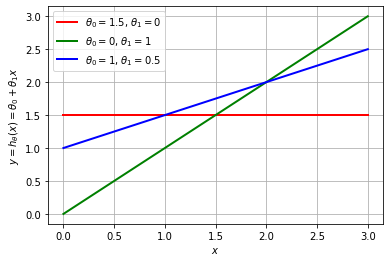

In [7]:
plt.figure(figsize=(6, 4))
x = np.linspace(0, 3)
h1 = 1.5 + 0 * x
h2 = 0 + 1 * x
h3 = 1 + 0.5 * x
plt.plot(x, h1, 'r', lw=2, label=r'$\theta_0=1.5$, $\theta_1=0$')
plt.plot(x, h2, 'g', lw=2, label=r'$\theta_0=0$, $\theta_1=1$')
plt.plot(x, h3, 'b', lw=2, label=r'$\theta_0=1$, $\theta_1=0.5$')
plt.xlabel('$x$')
plt.ylabel(r'$y=h_{\theta}(x) = \theta_0 + \theta_1 x$')
plt.grid()
plt.legend(loc='best')

In univariate linear regression, we have that our training examples look like the red crosses in the following figure:

Text(0, 0.5, '$y$')

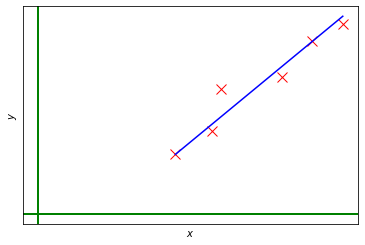

In [8]:
# Draw data and simple regression fits
plt.figure(figsize=(6, 4))
x_num = np.array([450, 570, 600, 800, 900, 1000])
y_num = np.array([100, 140, 210, 230, 290, 320])
plt.plot(x_num, y_num, 'rx', ms=10)
x_fit = np.linspace(0, 1000)
y_straight = (190 / 450) * (x_num - 450) + 100
plt.plot(x_num, y_straight, 'b')
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labeltop=False,
    labelleft=False,
    labelright=False)
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.xlabel('$x$')
plt.ylabel('$y$')

What we want to do is to come up with values for $\theta_0$ and $\theta_1$ such that the straight line fits the data well (blue line).

**How do we do this?**

- Choose $\theta_0, \theta_1$ so that $h_{\theta}(x)$ is close to $y$ for our training examples $(x,y)$.

Formally, as an optimization problem:

$$
\min_{\theta_0, \theta_1} \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2,
$$

where $h_{\theta}(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}$.

This motivates the definition of the cost function:

$$
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2.
$$

> This particular cost function is called the **sum of squared errors cost function**.

> This is not the unique cost function, but it turns out that it is indeed a good cost function choice, and works well for most of the regression problems.

In terms of the cost function, the above optimization problem can be rewritten as:

$$
\min_{\theta_0, \theta_1} J(\theta_0, \theta_1).
$$

### How does the cost function look like?

In [9]:
# Data (scaled)
x = data['size'].values / 1000
y = data['price'].values / 100000
m = len(x)
# Hypothesis function (as a function of the params)
def h(t0, t1):
    return t0 + t1 * x
# Cost function
def J(t0, t1):
    return ((h(t0, t1) - y)**2).sum() / (2 * m)

In [10]:
# Generate theta0, theta1 grid
t0 = np.linspace(-10, 30, 100)
t1 = np.linspace(-10, 10, 1000)
T0, T1 = np.meshgrid(t0, t1)

In [11]:
# Compute cost function in the theta0, theta1 grid
# TODO: find a more efficient way to evaluate this function
cost_fcn = np.zeros(T0.shape)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        cost_fcn[i, j] = J(T0[i, j], T1[i, j])

In [12]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Text(0.5, 0, '$J(\\theta_0, \\theta_1)$')

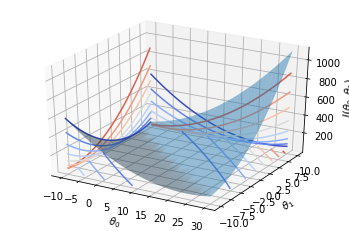

In [13]:
# 3D plot and contour plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, cost_fcn, rstride=8, cstride=8, alpha=0.5)
ax.contour(T0, T1, cost_fcn, zdir='z', offset=0, cmap=cm.coolwarm)
ax.contour(T0, T1, cost_fcn, zdir='x', offset=-10, cmap=cm.coolwarm)
ax.contour(T0, T1, cost_fcn, zdir='y', offset=10, cmap=cm.coolwarm)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta_0, \theta_1)$')

It's a bowl-shaped function (convex). Each point in this plot correspond to a possible line:

In [14]:
# Point 1
point1 = (600, 40)
# Point 2
point2 = (500, 50)
# Approximate minimum of the cost_fcn
min_idx = np.unravel_index(np.argmin(cost_fcn, axis=None), cost_fcn.shape)

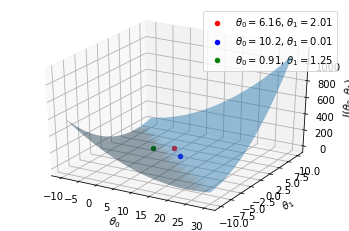

In [15]:
# 3D plot and some points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, cost_fcn, rstride=8, cstride=8, alpha=0.5)
ax.scatter(T0[point1], T1[point1], cost_fcn[point1], c='r',
           label=r'$\theta_0=${}, $\theta_1=${}'.format(np.round(T0[point1], 2), np.round(T1[point1], 2)))
ax.scatter(T0[point2], T1[point2], cost_fcn[point2], c='b',
           label=r'$\theta_0=${}, $\theta_1=${}'.format(np.round(T0[point2], 2), np.round(T1[point2], 2)))
ax.scatter(T0[min_idx], T1[min_idx], cost_fcn[min_idx], c='g',
           label=r'$\theta_0=${}, $\theta_1=${}'.format(np.round(T0[min_idx], 2), np.round(T1[min_idx], 2)))
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta_0, \theta_1)$')
ax.legend()

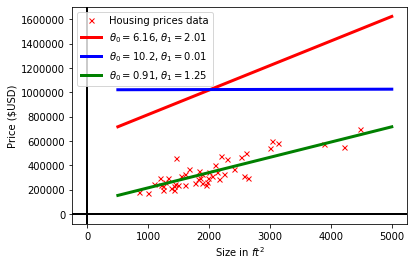

In [16]:
# Plot the corresponding lines
plt.figure(figsize=(6, 4))
plt.plot(data['size'], data['price'], 'xr', ms=5, label='Housing prices data')
x = np.linspace(500, 5000)
y1 = 100000 * (T0[point1] + T1[point1] * x / 1000)
y2 = 100000 * (T0[point2] + T1[point2] * x / 1000)
y3 = 100000 * (T0[min_idx] + T1[min_idx] * x / 1000)
plt.plot(x, y1, 'r', lw=3,
         label=r'$\theta_0=${}, $\theta_1=${}'.format(np.round(T0[point1], 2), np.round(T1[point1], 2)))
plt.plot(x, y2, 'b', lw=3,
         label=r'$\theta_0=${}, $\theta_1=${}'.format(np.round(T0[point2], 2), np.round(T1[point2], 2)))
plt.plot(x, y3, 'g', lw=3,
         label=r'$\theta_0=${}, $\theta_1=${}'.format(np.round(T0[min_idx], 2), np.round(T1[min_idx], 2)))
plt.axhline(y=0, c='k', lw=2)
plt.axvline(x=0, c='k', lw=2)
plt.xlabel('Size in $ft^2$')
plt.ylabel('Price ($USD)')
plt.legend(loc='best')

The green line minimizes the cost function approximately, and it corresponds to the parameters $\theta_0=0.91$ and $\theta_1=1.25$. 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>